In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_in = np.load("a2_data/images.npy")
data_out = np.load("a2_data/labels.npy")

In [3]:
def group(num):
    array = np.zeros(12)
    category = num
    category = int(category)
    array[category]=1
    return array

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [4]:
data_in, data_out = unison_shuffled_copies(data_in, data_out)

In [5]:
class_out = []
for i in range(len(data_out)):
    hour = data_out[i][0]
    hr_class = group(hour)
    class_out.append(hr_class)
class_out = np.array(class_out)

In [6]:
X_valid, X_train = data_in[15000:]/np.amax(data_in), data_in[:15000]/np.amax(data_in)
y_valid_0, y_train_0 = class_out[15000:], class_out[:15000]
y_valid_1, y_train_1 = data_out[15000:,1], data_out[:15000,1]

In [7]:
input_ = keras.layers.Input(shape=(150,150,1))
cnn = keras.layers.Conv2D(50, kernel_size=7, strides=2, activation='relu')(input_)
cnn = keras.layers.MaxPooling2D(pool_size=(2,2), strides=2)(cnn)
cnn = keras.layers.Conv2D(100, kernel_size=3, strides=1, activation='relu')(cnn)
cnn = keras.layers.MaxPooling2D(pool_size=(2,2))(cnn)
cnn = keras.layers.Conv2D(200, kernel_size=3, strides=1, activation='relu')(cnn)
cnn = keras.layers.MaxPooling2D(pool_size=(2,2))(cnn)
cnn = keras.layers.Conv2D(400, kernel_size=3, strides=1, activation='relu')(cnn)
cnn = keras.layers.Dropout(0.6)(cnn)
cnn = keras.layers.Flatten()(cnn)

hour = keras.layers.Dense(400, activation='relu')(cnn)
hour = keras.layers.Dense(400, activation='relu')(hour)
hour = keras.layers.Dense(12, activation='softmax', name='hour')(hour)

minute = keras.layers.Dense(400, activation='relu')(cnn)
#minute = keras.layers.Dense(400, activation='relu')(minute)
#minute = keras.layers.Dense(400, activation='relu')(minute)
minute = keras.layers.Dense(1, activation='linear', name='minute')(minute)

model = keras.Model(inputs=input_, outputs=[hour, minute])

Metal device set to: Apple M1


2022-11-12 19:17:40.852437: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-12 19:17:40.852524: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=[keras.losses.categorical_crossentropy, 'mse'], 
              optimizer=keras.optimizers.RMSprop(), 
              metrics=['accuracy', 'mse'])

In [9]:
history = model.fit(X_train, [y_train_0, y_train_1], epochs=50, verbose=1,
                    validation_data=(X_valid, [y_valid_0, y_valid_1]))

Epoch 1/50


2022-11-12 19:17:42.468318: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-12 19:17:43.034155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 378.7301 - hour_loss: 2.5187 - minute_loss: 376.2114 - hour_accuracy: 0.0799 - hour_mse: 0.0768 - minute_accuracy: 0.0163 - minute_mse: 376.2114

2022-11-12 19:18:24.833956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 44s 93ms/step - loss: 378.7301 - hour_loss: 2.5187 - minute_loss: 376.2114 - hour_accuracy: 0.0799 - hour_mse: 0.0768 - minute_accuracy: 0.0163 - minute_mse: 376.2114 - val_loss: 372.7473 - val_hour_loss: 2.4859 - val_minute_loss: 370.2613 - val_hour_accuracy: 0.0783 - val_hour_mse: 0.0764 - val_minute_accuracy: 0.0180 - val_minute_mse: 370.2613
Epoch 2/50
469/469 [==============================] - 43s 93ms/step - loss: 314.3570 - hour_loss: 2.4862 - minute_loss: 311.8709 - hour_accuracy: 0.0791 - hour_mse: 0.0764 - minute_accuracy: 0.0164 - minute_mse: 311.8709 - val_loss: 300.1131 - val_hour_loss: 2.4853 - val_minute_loss: 297.6280 - val_hour_accuracy: 0.0813 - val_hour_mse: 0.0764 - val_minute_accuracy: 0.0180 - val_minute_mse: 297.6280
Epoch 3/50
469/469 [==============================] - 44s 94ms/step - loss: 311.9537 - hour_loss: 2.4859 - minute_loss: 309.4678 - hour_accuracy: 0.0831 - hour_mse: 0.0764 - minute_accuracy: 0.0164 - minute_

469/469 [==============================] - 40s 85ms/step - loss: 61.6813 - hour_loss: 0.7055 - minute_loss: 60.9757 - hour_accuracy: 0.7213 - hour_mse: 0.0312 - minute_accuracy: 0.0155 - minute_mse: 60.9757 - val_loss: 82.7993 - val_hour_loss: 0.6727 - val_minute_loss: 82.1267 - val_hour_accuracy: 0.7353 - val_hour_mse: 0.0299 - val_minute_accuracy: 0.0183 - val_minute_mse: 82.1267
Epoch 22/50
469/469 [==============================] - 40s 85ms/step - loss: 54.9574 - hour_loss: 0.6588 - minute_loss: 54.2986 - hour_accuracy: 0.7437 - hour_mse: 0.0292 - minute_accuracy: 0.0161 - minute_mse: 54.2986 - val_loss: 71.2632 - val_hour_loss: 0.5371 - val_minute_loss: 70.7261 - val_hour_accuracy: 0.7930 - val_hour_mse: 0.0239 - val_minute_accuracy: 0.0180 - val_minute_mse: 70.7261
Epoch 23/50
469/469 [==============================] - 42s 89ms/step - loss: 49.2536 - hour_loss: 0.6340 - minute_loss: 48.6197 - hour_accuracy: 0.7549 - hour_mse: 0.0281 - minute_accuracy: 0.0161 - minute_mse: 48.6197

Epoch 42/50
469/469 [==============================] - 46s 98ms/step - loss: 14.3778 - hour_loss: 0.3902 - minute_loss: 13.9876 - hour_accuracy: 0.8565 - hour_mse: 0.0174 - minute_accuracy: 0.0163 - minute_mse: 13.9876 - val_loss: 46.2140 - val_hour_loss: 0.4226 - val_minute_loss: 45.7914 - val_hour_accuracy: 0.8543 - val_hour_mse: 0.0177 - val_minute_accuracy: 0.0173 - val_minute_mse: 45.7914
Epoch 43/50
469/469 [==============================] - 42s 89ms/step - loss: 13.2199 - hour_loss: 0.3755 - minute_loss: 12.8445 - hour_accuracy: 0.8637 - hour_mse: 0.0167 - minute_accuracy: 0.0160 - minute_mse: 12.8445 - val_loss: 50.7066 - val_hour_loss: 0.4843 - val_minute_loss: 50.2222 - val_hour_accuracy: 0.8550 - val_hour_mse: 0.0182 - val_minute_accuracy: 0.0173 - val_minute_mse: 50.2222
Epoch 44/50
469/469 [==============================] - 44s 94ms/step - loss: 12.7225 - hour_loss: 0.3560 - minute_loss: 12.3664 - hour_accuracy: 0.8717 - hour_mse: 0.0158 - minute_accuracy: 0.0178 - minute_

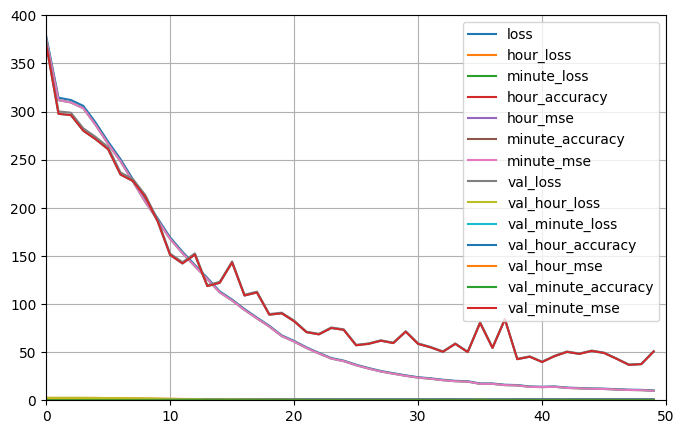

In [14]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,400) # set the vertical range to [0-1]
plt.gca().set_xlim(0,50)
plt.show()